# Identifikation wertloser Codeteile im Projekt "Spring Petlinic"

## Coverage-Daten

## Coverage-Daten laden

In [1]:
import pandas as pd

coverage = pd.read_csv("../dataset/jacoco_production_coverage_spring_petclinic.csv")
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED
0,org.springframework.samples.petclinic,PetclinicInitializer,0,24
1,org.springframework.samples.petclinic.model,NamedEntity,1,4
2,org.springframework.samples.petclinic.model,Specialty,0,1
3,org.springframework.samples.petclinic.model,PetType,0,1
4,org.springframework.samples.petclinic.model,Vets,4,0


## Einfache Metriken rechnen

In [2]:
coverage['lines'] = coverage.LINE_MISSED + coverage.LINE_COVERED
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED,lines
0,org.springframework.samples.petclinic,PetclinicInitializer,0,24,24
1,org.springframework.samples.petclinic.model,NamedEntity,1,4,5
2,org.springframework.samples.petclinic.model,Specialty,0,1,1
3,org.springframework.samples.petclinic.model,PetType,0,1,1
4,org.springframework.samples.petclinic.model,Vets,4,0,4


In [3]:
coverage['covered'] = coverage.LINE_COVERED / coverage.lines
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED,lines,covered
0,org.springframework.samples.petclinic,PetclinicInitializer,0,24,24,1.0
1,org.springframework.samples.petclinic.model,NamedEntity,1,4,5,0.8
2,org.springframework.samples.petclinic.model,Specialty,0,1,1,1.0
3,org.springframework.samples.petclinic.model,PetType,0,1,1,1.0
4,org.springframework.samples.petclinic.model,Vets,4,0,4,0.0


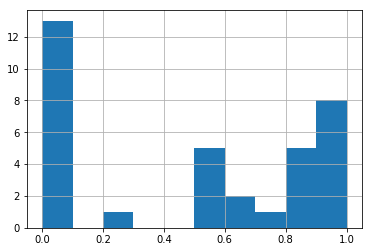

In [4]:
%matplotlib inline
coverage.covered.hist()

## Vorbereitung Join

In [5]:
coverage['fqn'] = coverage.PACKAGE + "." + coverage.CLASS
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED,lines,covered,fqn
0,org.springframework.samples.petclinic,PetclinicInitializer,0,24,24,1.0,org.springframework.samples.petclinic.Petclini...
1,org.springframework.samples.petclinic.model,NamedEntity,1,4,5,0.8,org.springframework.samples.petclinic.model.Na...
2,org.springframework.samples.petclinic.model,Specialty,0,1,1,1.0,org.springframework.samples.petclinic.model.Sp...
3,org.springframework.samples.petclinic.model,PetType,0,1,1,1.0,org.springframework.samples.petclinic.model.Pe...
4,org.springframework.samples.petclinic.model,Vets,4,0,4,0.0,org.springframework.samples.petclinic.model.Vets


In [6]:
coverage_per_class = coverage.set_index('fqn')[['lines', 'covered']]
coverage_per_class.head()

,lines,covered
fqn,,
org.springframework.samples.petclinic.PetclinicInitializer,24,1.0
org.springframework.samples.petclinic.model.NamedEntity,5,0.8
org.springframework.samples.petclinic.model.Specialty,1,1.0
org.springframework.samples.petclinic.model.PetType,1,1.0
org.springframework.samples.petclinic.model.Vets,4,0.0


# Technische Schulden

In [7]:
import requests
from pandas.io.json import json_normalize
URL = "https://sonarcloud.io/api/issues/search?languages=java&componentKeys=org.springframework.samples:spring-petclinic:boundedcontexts"
# in C:\dev\repos\software-analytics\demos\dataset
# python -m "http.server" 28080
#URL = "http://localhost:28080/sonarqube_search.json"
issues_json = requests.get(URL).json()
issues_json;

In [8]:
issues = json_normalize(issues_json['issues'])
issues.head()

,author,component,creationDate,debt,effort,flows,hash,key,line,message,...,rule,severity,status,tags,textRange.endLine,textRange.endOffset,textRange.startLine,textRange.startOffset,type,updateDate
0,feststelltaste@googlemail.com,org.springframework.samples:spring-petclinic:b...,2018-03-07T07:45:21+0100,2min,2min,[],48c1dff4bc3cd8f9b9b8c76f49484c2a,AWLJtvMj-pl6AHs2EogL,5,"Rename this field ""INSTANCE"" to match the regu...",...,squid:S3008,MINOR,OPEN,[convention],5,42,5,34,CODE_SMELL,2018-04-15T16:28:40+0200
1,feststelltaste@googlemail.com,org.springframework.samples:spring-petclinic:b...,2018-03-07T07:45:21+0100,20min,20min,[],48c1dff4bc3cd8f9b9b8c76f49484c2a,AWLJtvMj-pl6AHs2EogM,5,"Make this ""public static INSTANCE"" field final",...,squid:S1444,MINOR,OPEN,"[cert, cwe]",5,42,5,34,VULNERABILITY,2018-04-15T16:28:40+0200
2,feststelltaste@googlemail.com,org.springframework.samples:spring-petclinic:b...,2018-03-07T07:45:21+0100,10min,10min,[],48c1dff4bc3cd8f9b9b8c76f49484c2a,AWLJtvMj-pl6AHs2EogN,5,Make INSTANCE a static final constant or non-p...,...,squid:ClassVariableVisibilityCheck,MINOR,OPEN,[cwe],5,42,5,34,VULNERABILITY,2018-04-15T16:28:40+0200
3,feststelltaste@googlemail.com,org.springframework.samples:spring-petclinic:b...,2017-11-22T17:54:34+0100,5min,5min,[{'locations': [{'component': 'org.springframe...,815a0864eec54976893cbe650dfba48d,AWLJtvMo-pl6AHs2EogP,11,"Remove this unused method parameter ""id"".",...,squid:S1172,MAJOR,OPEN,"[cert, misra, unused]",11,60,11,58,CODE_SMELL,2018-04-15T16:28:40+0200
4,feststelltaste@googlemail.com,org.springframework.samples:spring-petclinic:b...,2017-11-22T17:54:34+0100,15min,15min,[],eb375774c265dedeefeb29283ceea9bc,AWLJtvMo-pl6AHs2EogR,15,Either re-interrupt this method or rethrow the...,...,squid:S2142,MAJOR,OPEN,"[cwe, multi-threading]",15,39,15,17,BUG,2018-04-15T16:28:40+0200


In [9]:
issues = issues[['component', 'debt']]
issues.head()

,component,debt
0,org.springframework.samples:spring-petclinic:b...,2min
1,org.springframework.samples:spring-petclinic:b...,20min
2,org.springframework.samples:spring-petclinic:b...,10min
3,org.springframework.samples:spring-petclinic:b...,5min
4,org.springframework.samples:spring-petclinic:b...,15min


In [10]:
issues['debt'] = issues.debt.apply(pd.Timedelta)
issues.head()

,component,debt
0,org.springframework.samples:spring-petclinic:b...,00:02:00
1,org.springframework.samples:spring-petclinic:b...,00:20:00
2,org.springframework.samples:spring-petclinic:b...,00:10:00
3,org.springframework.samples:spring-petclinic:b...,00:05:00
4,org.springframework.samples:spring-petclinic:b...,00:15:00


In [11]:
issues['fqn'] = issues.component.str.extract("/java/(.*).java", expand=True)
issues['fqn'] = issues.fqn.str.replace("/", ".")
issues.fqn[0]

'org.springframework.samples.petclinic.util.BrokenSingleton'

In [12]:
issues.head()

,component,debt,fqn
0,org.springframework.samples:spring-petclinic:b...,00:02:00,org.springframework.samples.petclinic.util.Bro...
1,org.springframework.samples:spring-petclinic:b...,00:20:00,org.springframework.samples.petclinic.util.Bro...
2,org.springframework.samples:spring-petclinic:b...,00:10:00,org.springframework.samples.petclinic.util.Bro...
3,org.springframework.samples:spring-petclinic:b...,00:05:00,org.springframework.samples.petclinic.util.Dat...
4,org.springframework.samples:spring-petclinic:b...,00:15:00,org.springframework.samples.petclinic.util.Dat...


In [13]:
debt_per_class = issues.groupby('fqn')[['debt']].sum()
debt_per_class.head()

,debt
fqn,
org.springframework.samples.petclinic.PetclinicInitializer,00:04:00
org.springframework.samples.petclinic.model.Pet,00:02:00
org.springframework.samples.petclinic.model.Vets,00:10:00
org.springframework.samples.petclinic.repository.OwnerRepository,00:15:00
org.springframework.samples.petclinic.repository.PetRepository,00:15:00


In [14]:
analysis = coverage_per_class.join(debt_per_class)
analysis.head()

,lines,covered,debt
fqn,,,
org.springframework.samples.petclinic.PetclinicInitializer,24,1.0,00:04:00
org.springframework.samples.petclinic.model.NamedEntity,5,0.8,NaT
org.springframework.samples.petclinic.model.Specialty,1,1.0,NaT
org.springframework.samples.petclinic.model.PetType,1,1.0,NaT
org.springframework.samples.petclinic.model.Vets,4,0.0,00:10:00


In [15]:
analysis = analysis.fillna(0)
analysis.head()

,lines,covered,debt
fqn,,,
org.springframework.samples.petclinic.PetclinicInitializer,24,1.0,00:04:00
org.springframework.samples.petclinic.model.NamedEntity,5,0.8,00:00:00
org.springframework.samples.petclinic.model.Specialty,1,1.0,00:00:00
org.springframework.samples.petclinic.model.PetType,1,1.0,00:00:00
org.springframework.samples.petclinic.model.Vets,4,0.0,00:10:00


## Sichten bilden

### Fachliche Sicht über Klassennamen

In [16]:
domains = "Owner,Pet,Visit,Vet,Specialty,Clinic".split(",")
domains

['Owner', 'Pet', 'Visit', 'Vet', 'Specialty', 'Clinic']

In [17]:
analysis['domain'] = "Other"

for domain in domains:
    analysis.loc[analysis.index.str.contains(domain), 'domain'] = domain

analysis.head()

,lines,covered,debt,domain
fqn,,,,
org.springframework.samples.petclinic.PetclinicInitializer,24,1.0,00:04:00,Pet
org.springframework.samples.petclinic.model.NamedEntity,5,0.8,00:00:00,Other
org.springframework.samples.petclinic.model.Specialty,1,1.0,00:00:00,Specialty
org.springframework.samples.petclinic.model.PetType,1,1.0,00:00:00,Pet
org.springframework.samples.petclinic.model.Vets,4,0.0,00:10:00,Vet


### Technische Funktion über Package-Namen

In [18]:
analysis['tech'] = analysis.index.str.split(".").str[-2]
analysis.head()

,lines,covered,debt,domain,tech
fqn,,,,,
org.springframework.samples.petclinic.PetclinicInitializer,24,1.0,00:04:00,Pet,petclinic
org.springframework.samples.petclinic.model.NamedEntity,5,0.8,00:00:00,Other,model
org.springframework.samples.petclinic.model.Specialty,1,1.0,00:00:00,Specialty,model
org.springframework.samples.petclinic.model.PetType,1,1.0,00:00:00,Pet,model
org.springframework.samples.petclinic.model.Vets,4,0.0,00:10:00,Vet,model


In [19]:
analysis.groupby('tech').covered.mean()

tech
jdbc         0.000000
jpa          0.691558
model        0.739048
petclinic    1.000000
service      0.888889
util         0.135417
web          0.639809
Name: covered, dtype: float64

In [20]:
analysis.head()

,lines,covered,debt,domain,tech
fqn,,,,,
org.springframework.samples.petclinic.PetclinicInitializer,24,1.0,00:04:00,Pet,petclinic
org.springframework.samples.petclinic.model.NamedEntity,5,0.8,00:00:00,Other,model
org.springframework.samples.petclinic.model.Specialty,1,1.0,00:00:00,Specialty,model
org.springframework.samples.petclinic.model.PetType,1,1.0,00:00:00,Pet,model
org.springframework.samples.petclinic.model.Vets,4,0.0,00:10:00,Vet,model


In [21]:
management_compatible_data = analysis.groupby('domain').agg({"covered": "mean", "debt" : "sum", "lines" : "sum"})
management_compatible_data.debt = management_compatible_data.debt.dt.seconds / 60
management_compatible_data.columns = ['Utilization (%)', 'Technical Debt (min)', 'Size']
management_compatible_data.head()

,Utilization (%),Technical Debt (min),Size
domain,,,
Clinic,0.888889,40.0,18
Other,0.480208,117.0,57
Owner,0.549495,65.0,130
Pet,0.594156,30.0,153
Specialty,1.000000,0.0,1


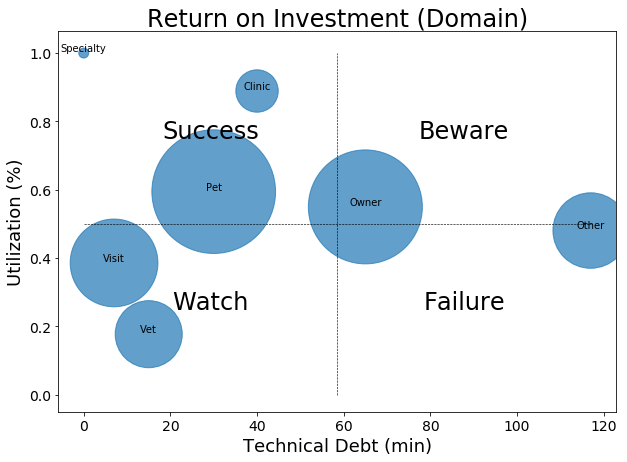

In [22]:
%matplotlib inline

from ausi import portfolio

portfolio.plot_diagram(management_compatible_data, "Technical Debt (min)", "Utilization (%)", "Size", "Domain")

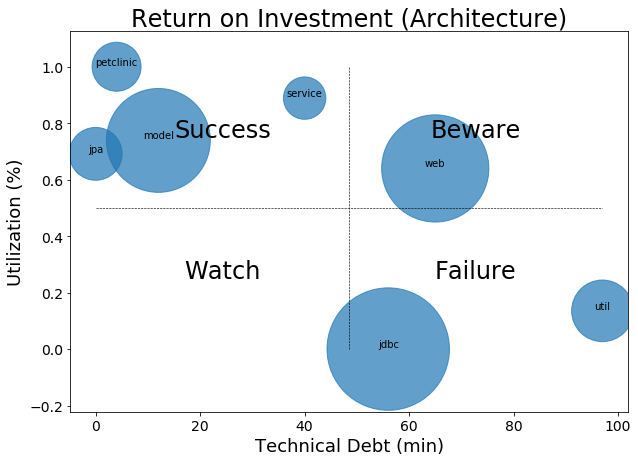

In [23]:
management_compatible_data = analysis.groupby('tech').agg({"covered": "mean", "debt" : "sum", "lines" : "sum"})
management_compatible_data.debt = management_compatible_data.debt.dt.seconds / 60
management_compatible_data.columns = ['Utilization (%)', 'Technical Debt (min)', 'Size']
portfolio.plot_diagram(management_compatible_data, "Technical Debt (min)", "Utilization (%)", "Size", "Architecture")